In [1]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\young\\Google 드라이브\\drive-download-20181204T145743Z-001'

In [2]:
os.listdir(path='./')

['.ipynb_checkpoints',
 'Be the L.BA 데이터설명서.docx',
 'Custom.csv',
 'L_point_weather.csv',
 'Master.csv',
 'Product.csv',
 'product_session.csv',
 'Search1.csv',
 'Search2.csv',
 'Session.csv',
 'session_weather.csv',
 '기상별 구매상품 & 구매액.ipynb',
 '날씨 관련.JPG',
 '상품 & 세션 데이터 merge.ipynb',
 '세션 잔류시간 대비 구매액.ipynb',
 '세션_날씨 작업.ipynb',
 '자료.데이터설명.pdf',
 '졸려~.zip',
 '지역별 접속 횟수 및 잔류시간.ipynb']

In [3]:
product = pd.read_csv("Product.csv")
sess_weath = pd.read_csv("session_weather.csv")

C:\Anaconda3\envs\keras_gpu\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [5]:
sess_weath.head()

,Unnamed: 0,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,DATE,WEATHER,T_MAX,T_MIN,simple
0,0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
1,1,6139048,8646190,381,20180509,414.0,"8,832",tablet,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
2,2,6472180,8628644,43,20180509,95.0,"2,277",mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
3,3,4747936,8652426,1,20180509,13.0,730,desktop,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
4,4,4759574,8622778,11,20180509,168.0,"1,790",mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음


In [23]:
sess_weath.drop(['Unnamed: 0'], axis=1, inplace=True)

In [24]:
sess_weath.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,DATE,WEATHER,T_MAX,T_MIN,simple
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
1,6139048,8646190,381,20180509,414.0,"8,832",tablet,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
2,6472180,8628644,43,20180509,95.0,"2,277",mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
3,4747936,8652426,1,20180509,13.0,730,desktop,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음
4,4759574,8622778,11,20180509,168.0,"1,790",mobile,Daejeon,Daejeon,20180509,맑음,9.0,23.0,맑음


In [25]:
product_sess_weath = product.merge(sess_weath, left_on = ['CLNT_ID','SESS_ID'], right_on=['CLNT_ID','SESS_ID'])

In [26]:
product_sess_weath.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,DATE,WEATHER,T_MAX,T_MIN,simple
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,20180526,맑음/안개,14.0,30.0,맑음
1,4139680,7605037,12,401577,색상:몰리 와우,[바비브라운],"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,20180526,맑음/안개,14.0,30.0,맑음
2,4139680,7605037,28,401577,색상:몰리 와우,[바비브라운],"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,20180526,맑음/안개,14.0,30.0,맑음
3,4139680,7605037,28,642112,색상:카바나,[바비브라운],"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,20180526,맑음/안개,14.0,30.0,맑음
4,4139680,7605037,12,642112,색상:카바나,[바비브라운],"39,000",1,1,20180526,21.0,902,desktop,Seoul,Seoul,20180526,맑음/안개,14.0,30.0,맑음


In [27]:
master = pd.read_csv("Master.csv")

In [31]:
total=product_sess_weath.merge(master, left_on =['PD_C'],right_on=['PD_C'])

# 필요없는 열 제거

In [32]:
total.drop(['HITS_SEQ','SESS_SEQ','TOT_PAG_VIEW_CT','TOT_SESS_HR_V','ZON_NM','CITY_NM','DATE','WEATHER'], axis=1, inplace=True)

In [35]:
total.head(20)

,CLNT_ID,SESS_ID,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_DT,DVC_CTG_NM,T_MAX,T_MIN,simple,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4139680,7605037,642112,색상:워터멜론,[바비브라운],"39,000",1,20180526,desktop,14.0,30.0,맑음,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
1,4139680,7605037,642112,색상:카바나,[바비브라운],"39,000",1,20180526,desktop,14.0,30.0,맑음,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
2,4139680,7605037,642112,색상:카바나,[바비브라운],"39,000",1,20180526,desktop,14.0,30.0,맑음,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
3,4139680,7605037,642112,색상:워터멜론,[바비브라운],"39,000",1,20180526,desktop,14.0,30.0,맑음,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
4,4350334,2023661,642112,색상:엔젤 / 1개,바비브라운,"39,000",1,20180827,mobile,20.0,25.0,흐림,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
5,5131391,7757426,642112,색상:루비 / 1개,바비브라운,"39,000",1,20180524,mobile,14.0,24.0,구름조금,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
6,5131391,7757426,642112,색상:카바나 / 1개,바비브라운,"39,000",1,20180524,mobile,14.0,24.0,구름조금,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
7,5172356,4714565,642112,색상:카바나,[바비브라운],"39,000",1,20180713,desktop,24.0,32.0,구름많음,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
8,5444959,6843465,642112,색상:워터멜론 / 1개,바비브라운,"39,000",1,20180608,mobile,18.0,27.0,구름많음,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
9,5461276,7896792,642112,색상:워터멜론 / 1개,바비브라운,"39,000",1,20180521,mobile,13.0,19.0,흐림,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터


In [37]:
total['PD_BUY_AM'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
total['PD_BUY_CT'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
total[['PD_BUY_AM','PD_BUY_CT']] = total[['PD_BUY_AM','PD_BUY_CT']].astype(float)

In [38]:
total['sum_pri']=total.PD_BUY_AM * total.PD_BUY_CT

In [43]:
total_smy = total.groupby("simple").mean()

In [45]:
total_smy

,CLNT_ID,SESS_ID,PD_C,PD_BUY_AM,PD_BUY_CT,SESS_DT,T_MAX,T_MIN,sum_pri
simple,,,,,,,,,
구름많음,3.335828e+06,5.351911e+06,454773.108124,51680.887652,1.183416,2.018067e+07,18.852428,27.788837,54433.690623
구름조금,3.299296e+06,5.962917e+06,463695.840289,50297.060328,1.174520,2.018064e+07,17.461197,28.149713,52924.359264
눈,3.070832e+06,1.060427e+07,587781.009852,54130.541872,1.144089,2.018041e+07,2.530788,10.592365,56135.960591
맑음,3.325361e+06,6.134597e+06,467788.258284,51351.702732,1.177661,2.018063e+07,16.068846,27.606727,53926.210554
비,3.226314e+06,7.397636e+06,492792.245377,44740.666003,1.151463,2.018056e+07,16.160874,23.605862,46640.837296
흐림,3.347166e+06,5.864739e+06,466528.018474,52669.141883,1.178061,2.018065e+07,17.646966,23.434918,55691.504259


In [47]:
plot_gp = total_smy[['sum_pri']]

In [48]:
# 시각화 작업을 위한 모듈 로딩작업
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '평균 구매액')

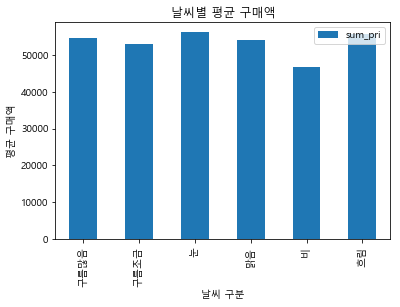

In [49]:
%matplotlib inline

plot_gp.plot(kind='bar')
plt.title('날씨별 평균 구매액')
plt.xlabel('날씨 구분')
plt.ylabel('평균 구매액')

In [75]:
total.groupby(["simple","DVC_CTG_NM"]).count()

CLNT_ID  SESS_ID     PD_C  PD_ADD_NM  PD_BRA_NM  PD_BUY_AM  \
simple DVC_CTG_NM                                                               
구름많음   desktop      234540   234540   234540     234540     234540     234540   
       mobile      1101116  1101116  1101116    1101116    1101116    1101116   
       tablet         6367     6367     6367       6367       6367       6367   
구름조금   desktop      259825   259825   259825     259825     259825     259825   
       mobile      1098408  1098408  1098408    1098408    1098408    1098408   
       tablet         6429     6429     6429       6429       6429       6429   
눈      desktop         178      178      178        178        178        178   
       mobile          625      625      625        625        625        625   
       tablet            9        9        9          9          9          9   
맑음     desktop      153317   153317   153317     153317     153317     153317   
       mobile       703063   703063   703063     703063     703063     703063   
       tablet         3743     3743     3743       3743       3743       3743   
비      desktop       25860    25860    25860      25860      25860      25860   
       mobile        91575    91575    91575      91575      91575      91575   
       tablet          620      620      620        620        620        620   
흐림     desktop      240477   240477   240477     240477     240477     240477   
       mobile      1092661  1092661  1092661    1092661    1092661    1092661   
       tablet         6093     6093     6093       6093       6093       6093   

                   PD_BUY_CT  SESS_DT    T_MAX    T_MIN    PD_NM  CLAC1_NM  \
simple DVC_CTG_NM                                                            
구름많음   desktop        234540   234540   234540   234540   234540    234540   
       mobile        1101116  1101116  1101116  1101116  1101116   1101116   
       tablet           6367     6367     6367     6367     6367      6367   
구름조금   desktop        259825   259825   259825   259825   259825    259825   
       mobile        1098408  1098408  1098408  1098408  1098408   1098408   
       tablet           6429     6429     6429     6429     6429      6429   
눈      desktop           178      178      178      178      178       178   
       mobile            625      625      625      625      625       625   
       tablet              9        9        9        9        9         9   
맑음     desktop        153317   153317   153317   153317   153317    153317   
       mobile         703063   703063   703063   703063   703063    703063   
       tablet           3743     3743     3743     3743     3743      3743   
비      desktop         25860    25860    25860    25860    25860     25860   
       mobile          91575    91575    91575    91575    91575     91575   
       tablet            620      620      620      620      620       620   
흐림     desktop        240477   240477   240477   240477   240477    240477   
       mobile        1092661  1092661  1092661  1092661  1092661   1092661   
       tablet           6093     6093     6093     6093     6093      6093   

                   CLAC2_NM  CLAC3_NM  sum_pri  
simple DVC_CTG_NM                               
구름많음   desktop       234540    234540   234540  
       mobile       1101116   1101116  1101116  
       tablet          6367      6367     6367  
구름조금   desktop       259825    259825   259825  
       mobile       1098408   1098408  1098408  
       tablet          6429      6429     6429  
눈      desktop          178       178      178  
       mobile           625       625      625  
       tablet             9         9        9  
맑음     desktop       153317    153317   153317  
       mobile        703063    703063   703063  
       tablet          3743      3743     3743  
비      desktop        25860     25860    25860  
       mobile         91575     91575    91575  
       tablet           620       620      620  
흐림  

In [81]:
print(234540/(1101116+234540))
print(259825/(1098408+259825))
print(153317/(153327+703063))
print(25860/(25860+91575))
print(240477/(240477+1092661))

0.17559910635672657
0.19129633869888304
0.1790270787841988
0.22020692297866906
0.1803841762818253


In [68]:
total_ctg =total.groupby(["CLAC1_NM","simple"]).mean()

In [69]:
total_ctg

CLNT_ID       SESS_ID           PD_C      PD_BUY_AM  \
CLAC1_NM simple                                                             
가구       구름많음    3.395423e+06  5.303695e+06  592078.192525  266885.420400   
         구름조금    3.354493e+06  5.930450e+06  601720.292649  266270.760070   
         눈       2.311778e+06  1.062553e+07  743889.312500  237999.375000   
         맑음      3.361809e+06  5.964970e+06  601285.407847  272654.326682   
         비       3.123060e+06  7.644586e+06  635314.644287  239785.526502   
         흐림      3.362827e+06  5.646747e+06  594703.307043  270059.320624   
건강식품     구름많음    3.392471e+06  4.665529e+06  527614.603029   67905.986976   
         구름조금    3.325133e+06  5.524068e+06  535110.522419   67046.543692   
         눈       2.735925e+06  1.060349e+07  709628.375000   65418.750000   
         맑음      3.364957e+06  5.828920e+06  544082.051597   68620.579550   
         비       3.065920e+06  7.382142e+06  571516.238007   57793.954355   
         흐림      3.409596e+06  4.958490e+06  531616.641403   72082.912830   
계절가전     구름많음    3.175384e+06  5.313301e+06  446274.528503  365676.815220   
         구름조금    3.254499e+06  5.152822e+06  433940.566461  368426.940746   
         맑음      3.245134e+06  5.295338e+06  440203.695328  390265.185173   
         비       3.142560e+06  6.298970e+06  464878.683099  334081.619718   
         흐림      3.192431e+06  6.421247e+06  478833.853461  338583.277614   
과일       구름많음    3.395900e+06  4.299783e+06  573382.868589   25118.947879   
         구름조금    3.275142e+06  5.276867e+06  585743.135709   23157.193522   
         눈       2.446498e+06  1.061160e+07  605091.666667   25766.666667   
         맑음      3.326931e+06  5.759612e+06  592830.224340   21213.700880   
         비       3.195381e+06  7.531360e+06  584145.073529   19588.676471   
         흐림      3.443438e+06  4.384680e+06  576806.637492   27370.923369   
구기/필드스포츠 구름많음    3.242700e+06  5.350297e+06  481477.638531   72657.090728   
         구름조금    3.241540e+06  5.945804e+06  499415.832957   67354.681813   
         눈       3.060554e+06  1.058366e+07  684412.000000   18287.500000   
         맑음      3.288560e+06  6.119491e+06  500120.622635   66326.632011   
         비       3.227150e+06  7.430701e+06  534059.484973   66256.653005   
         흐림      3.288848e+06  5.789812e+06  494022.018838   74292.575522   
남성의류     구름많음    3.328784e+06  5.692313e+06  372667.548007   32752.105078   
...                       ...           ...            ...            ...   
컴퓨터      구름많음    3.298215e+06  5.110812e+06  579406.866378  201448.579802   
         구름조금    3.344189e+06  5.535239e+06  587807.082359  196632.354855   
         눈       1.484964e+06  1.061875e+07  589070.000000   20850.000000   
         맑음      3.294276e+06  5.962856e+06  600049.923577  205309.358266   
         비       3.159685e+06  7.149940e+06  632410.846369  148110.405028   
         흐림      3.303285e+06  5.702644e+06  594481.637559  195901.111410   
패션잡화     구름많음    3.323483e+06  5.493021e+06  459211.887402  101232.745896   
         구름조금    3.299213e+06  5.988952e+06  469025.897442   95997.796270   
         눈       2.902326e+06  1.060411e+07  588351.285714   68931.538462   
         맑음      3.310531e+06  6.184295e+06  476693.168530   99316.765490   
         비       3.258325e+06  7.353866e+06  490867.329240   83795.816960   
         흐림      3.331928e+06  5.981952e+06  470851.506951  100502.951181   
퍼스널케어    구름많음    3.378001e+06  4.938118e+06  575926.534520   24223.272079   
         구름조금    3.312898e+06  5.624222e+06  586725.430903   23979.813068   
         눈       3.960016e+06  1.061997e+07  605918.760000   23020.000000   
         맑음      3.355597e+06  5.943613e+06  591703.186325   24588.392278   
         비       3.271398e+06  7.270440e+06  613446.181159   23013.699103   
         흐림      3.380170e+06  5.519908e+06  582508.536219   24446.556648   
헬스/피트니스  구름많음    3.326044e+06  5.793977e+06  558242.064138   46312.912858   
         구름조금    3

In [70]:
plot_gp2 = total_ctg[['sum_pri']]

In [73]:
plot_gp2

sum_pri
CLAC1_NM simple               
가구       구름많음    282717.474479
         구름조금    284268.893084
         눈       237999.375000
         맑음      288748.693407
         비       257304.577150
         흐림      288181.912189
건강식품     구름많음     84146.991104
         구름조금     85926.816591
         눈        81293.750000
         맑음       88162.354876
         비        65488.691197
         흐림       91520.486673
계절가전     구름많음    378772.670317
         구름조금    378682.042553
         맑음      398933.773527
         비       340600.211268
         흐림      352985.788660
과일       구름많음     32069.183532
         구름조금     31015.810526
         눈        25766.666667
         맑음       26105.894428
         비        22880.441176
         흐림       34168.235592
구기/필드스포츠 구름많음     76262.696318
         구름조금     70357.701364
         눈        18287.500000
         맑음       68961.138959
         비        71922.281421
         흐림       77965.102312
남성의류     구름많음     33421.214513
...                        ...
컴퓨터      구름많음    209523.437519
         구름조금    204068.153533
         눈        20850.000000
         맑음      210604.067480
         비       152020.069832
         흐림      203097.555151
패션잡화     구름많음    102418.577869
         구름조금     96869.750134
         눈        69178.791209
         맑음      100299.271417
         비        85195.515278
         흐림      101505.819552
퍼스널케어    구름많음     27716.536263
         구름조금     27688.296719
         눈        40224.000000
         맑음       27877.777984
         비        25775.151829
         흐림       28218.623276
헬스/피트니스  구름많음     48013.700488
         구름조금     45569.009363
         눈        32350.000000
         맑음       40202.112966
         비        59202.995320
         흐림       44749.412734
화장품/뷰티케어 구름많음     52129.596264
         구름조금     51454.757781
         눈        48764.795918
         맑음       52594.255862
         비        47687.168857
         흐림       53908.009751

[217 rows x 1 columns]